# Example of fitting a two-dimensional MDN  with one output
-------

The idea behind this is example is to fit a mixture density network to something that is similar to a final size distribution of an epidemic. Instead of just varying a single $R_0$ parameter, we can instead vary two parameters $\alpha$ and $\beta$, with the relationship $\frac{\alpha}{\beta} = R_0$. This will then test how well the fitting can cope with uneven sampling over the main parameter dimension if its some complex function of the input dimensions.

In [1]:
%pylab inline
import sys
sys.path.append('../')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import importlib
import pydra
import gen_data_utils as gd
import seaborn as sns
importlib.reload(pydra)
importlib.reload(gd)

Using TensorFlow backend.


<module 'gen_data_utils' from '/Users/m.irvine/Dropbox/Emulation project/pydra/notebooks/gen_data_utils.py'>

In [3]:
model = pydra.load_mdn_model(cluster_size=10,output_size=1,layers=3,input_size=2,
                       dense_layer_size=64,print_summary=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           192         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           4160        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 64)           4160        dense_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (D

## Set-up data

In [4]:
alpha = np.random.uniform(0,1,1000)
beta = np.random.uniform(1,2,1000)
x = alpha/beta

In [5]:
_,y = gd.final_size(x=x)


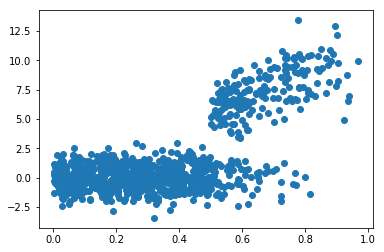

In [7]:
plt.plot(x,y,'o');

In [8]:
def shape_for_mdn(x):
    return x.reshape(x.size,1)
x = shape_for_mdn(x)
alpha = shape_for_mdn(alpha)
beta = shape_for_mdn(beta)

In [12]:
data = np.hstack((alpha,beta))

In [13]:
history = model.fit(data, y, epochs=500, batch_size=500,
          verbose=1)

Epoch 1/500
1000/1000 [==============================] - 0s 162us/step - loss: 4.3520
Epoch 2/500
1000/1000 [==============================] - 0s 23us/step - loss: 4.2258
Epoch 3/500
1000/1000 [==============================] - 0s 23us/step - loss: 4.0782
Epoch 4/500
1000/1000 [==============================] - 0s 17us/step - loss: 3.8979
Epoch 5/500
1000/1000 [==============================] - 0s 18us/step - loss: 3.7035
Epoch 6/500
1000/1000 [==============================] - 0s 19us/step - loss: 3.4653
Epoch 7/500
1000/1000 [==============================] - 0s 16us/step - loss: 3.2308
Epoch 8/500
1000/1000 [==============================] - 0s 17us/step - loss: 2.9582
Epoch 9/500
1000/1000 [==============================] - 0s 16us/step - loss: 2.7252
Epoch 10/500
1000/1000 [==============================] - 0s 23us/step - loss: 2.5499
Epoch 11/500
1000/1000 [==============================] - 0s 20us/step - loss: 2.4258
Epoch 12/500
1000/1000 [==============================] - 0s 1

1000/1000 [==============================] - 0s 72us/step - loss: 1.7469
Epoch 97/500
1000/1000 [==============================] - 0s 32us/step - loss: 1.7414
Epoch 98/500
1000/1000 [==============================] - 0s 41us/step - loss: 1.7363
Epoch 99/500
1000/1000 [==============================] - 0s 37us/step - loss: 1.7310
Epoch 100/500
1000/1000 [==============================] - 0s 60us/step - loss: 1.7243
Epoch 101/500
1000/1000 [==============================] - 0s 31us/step - loss: 1.7176
Epoch 102/500
1000/1000 [==============================] - 0s 21us/step - loss: 1.7098
Epoch 103/500
1000/1000 [==============================] - 0s 22us/step - loss: 1.7016
Epoch 104/500
1000/1000 [==============================] - 0s 26us/step - loss: 1.6911
Epoch 105/500
1000/1000 [==============================] - 0s 22us/step - loss: 1.6826
Epoch 106/500
1000/1000 [==============================] - 0s 24us/step - loss: 1.6753
Epoch 107/500
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s 22us/step - loss: 1.6267
Epoch 191/500
1000/1000 [==============================] - 0s 21us/step - loss: 1.6261
Epoch 192/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.6273
Epoch 193/500
1000/1000 [==============================] - 0s 20us/step - loss: 1.6265
Epoch 194/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6246
Epoch 195/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6245
Epoch 196/500
1000/1000 [==============================] - 0s 21us/step - loss: 1.6244
Epoch 197/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.6234
Epoch 198/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.6229
Epoch 199/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6213
Epoch 200/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.6217
Epoch 201/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 17us/step - loss: 1.6001
Epoch 285/500
1000/1000 [==============================] - 0s 15us/step - loss: 1.5990
Epoch 286/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.6000
Epoch 287/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6000
Epoch 288/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.6006
Epoch 289/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.5985
Epoch 290/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.5987
Epoch 291/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.5987
Epoch 292/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.5969
Epoch 293/500
1000/1000 [==============================] - 0s 20us/step - loss: 1.5990
Epoch 294/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.5965
Epoch 295/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 15us/step - loss: 1.5877
Epoch 377/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.5819
Epoch 378/500
1000/1000 [==============================] - 0s 15us/step - loss: 1.5849
Epoch 379/500
1000/1000 [==============================] - 0s 14us/step - loss: 1.5840
Epoch 380/500
1000/1000 [==============================] - 0s 15us/step - loss: 1.5825
Epoch 381/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.5841
Epoch 382/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.5826
Epoch 383/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.5801
Epoch 384/500
1000/1000 [==============================] - 0s 19us/step - loss: 1.5864
Epoch 385/500
1000/1000 [==============================] - 0s 20us/step - loss: 1.5827
Epoch 386/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.5823
Epoch 387/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 16us/step - loss: 1.5644
Epoch 470/500
1000/1000 [==============================] - 0s 14us/step - loss: 1.5671
Epoch 471/500
1000/1000 [==============================] - 0s 18us/step - loss: 1.5656
Epoch 472/500
1000/1000 [==============================] - 0s 14us/step - loss: 1.5664
Epoch 473/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.5628
Epoch 474/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.5672
Epoch 475/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.5666
Epoch 476/500
1000/1000 [==============================] - 0s 16us/step - loss: 1.5654
Epoch 477/500
1000/1000 [==============================] - 0s 17us/step - loss: 1.5677
Epoch 478/500
1000/1000 [==============================] - 0s 15us/step - loss: 1.5651
Epoch 479/500
1000/1000 [==============================] - 0s 15us/step - loss: 1.5684
Epoch 480/500
1000/1000 [==============================] 

## Plot Loss for each output

In [14]:
print(history.history.keys())

dict_keys(['loss'])


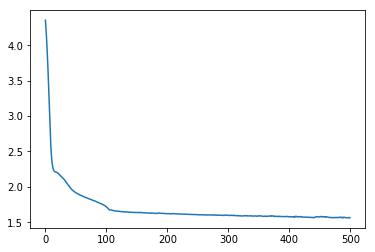

In [15]:
plt.plot(history.history['loss']);

## Test output results

In [20]:
alpha_test = np.random.uniform(0,1,5000)
beta_test = np.random.uniform(1,2,5000)
x_test = alpha_test/beta_test
alpha_test = shape_for_mdn(alpha_test)
beta_test = shape_for_mdn(beta_test)
data_test = np.hstack((alpha_test,beta_test))

In [21]:
output = model.predict(data_test)

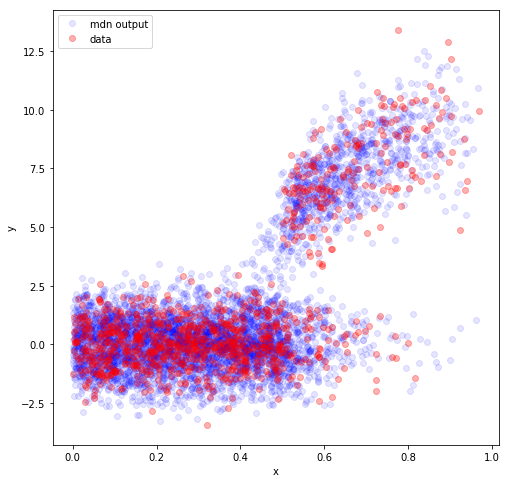

In [22]:
y_test = pydra.generate_mdn_sample_from_ouput(output, x_test.size)
plt.figure(figsize=(8, 8))

plt.plot(x_test,y_test,'bo',alpha=0.1,label='mdn output')
plt.plot(x,y,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');